In [162]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 1 Import data

In [80]:
train_data = pd.read_csv(r'C:\Users\Yevhen\Desktop\car_price\car_price\car_data\linreg_train.csv')

In [81]:
test_data = pd.read_csv(r'C:\Users\Yevhen\Desktop\car_price\car_price\car_data\linreg_test.csv')

In [82]:
y_train = pd.read_csv(r'C:\Users\Yevhen\Desktop\car_price\car_price\car_data\linreg_y_train.csv')

In [83]:
train_data.head()

,Unnamed: 0,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,car_maker
0,5912,Passat,2019,Manual,15435,Diesel,150,51.4,2.0,vw
1,2828,A Class,2019,Semi-Auto,17945,Diesel,145,65.7,1.5,mercedes
2,2329,Focus,2017,Manual,20102,Petrol,20,60.1,1.0,ford
3,5705,C-HR,2018,Automatic,8661,Hybrid,135,74.3,1.8,toyota
4,4985,Fiesta,2020,Manual,10,Petrol,150,58.9,1.0,ford


In [84]:
test_data.head()

,Unnamed: 0,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,car_maker,id
0,0,C-MAX,2017,Manual,26805,Diesel,145,68.9,1.5,ford,0
1,1,1 Series,2017,Manual,24104,Petrol,125,53.3,1.5,bmw,1
2,2,T-Cross,2019,Manual,4899,Petrol,145,47.9,1.0,vw,2
3,3,A1,2019,Automatic,7000,Petrol,145,47.1,1.0,audi,3
4,4,Yaris,2016,Automatic,35588,Hybrid,0,86.0,1.5,toyota,4


In [85]:
y_train.head()

,Unnamed: 0,price
0,5912,16795
1,2828,18480
2,2329,9995
3,5705,20995
4,4985,17000


# 1.1 Data information

In [86]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64556 entries, 0 to 64555
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    64556 non-null  int64  
 1   model         64556 non-null  object 
 2   year          64556 non-null  int64  
 3   transmission  64556 non-null  object 
 4   mileage       64556 non-null  int64  
 5   fuelType      64556 non-null  object 
 6   tax           64556 non-null  int64  
 7   mpg           64556 non-null  float64
 8   engineSize    64556 non-null  float64
 9   car_maker     64556 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 4.9+ MB


In [87]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16139 entries, 0 to 16138
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    16139 non-null  int64  
 1   model         16139 non-null  object 
 2   year          16139 non-null  int64  
 3   transmission  16139 non-null  object 
 4   mileage       16139 non-null  int64  
 5   fuelType      16139 non-null  object 
 6   tax           16139 non-null  int64  
 7   mpg           16139 non-null  float64
 8   engineSize    16139 non-null  float64
 9   car_maker     16139 non-null  object 
 10  id            16139 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 1.4+ MB


Not have Null elmes

In [88]:
train_data.nunique()

Unnamed: 0      17299
model             155
year               26
transmission        4
mileage         33293
fuelType            5
tax                47
mpg               186
engineSize         40
car_maker           7
dtype: int64

In [89]:
train_data.describe()

,Unnamed: 0,year,mileage,tax,mpg,engineSize
count,64556.000000,64556.000000,64556.000000,64556.000000,64556.000000,64556.000000
mean,6444.076012,2017.114102,23031.711491,118.783072,55.846761,1.716775
std,4326.213393,2.132108,21499.436955,64.560914,17.039259,0.590944
min,0.000000,1996.000000,1.000000,0.000000,1.100000,0.000000
25%,2881.000000,2016.000000,6970.750000,125.000000,47.900000,1.200000
50%,5762.000000,2017.000000,17162.500000,145.000000,55.400000,1.600000
75%,9523.000000,2019.000000,32387.500000,145.000000,64.200000,2.000000
max,17964.000000,2060.000000,323000.000000,580.000000,470.800000,6.600000


We have anomaly. Year.max = 2060

# 2 Exploratory data analysis

 #    2.1 Target

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028908CE1400>]],
      dtype=object)

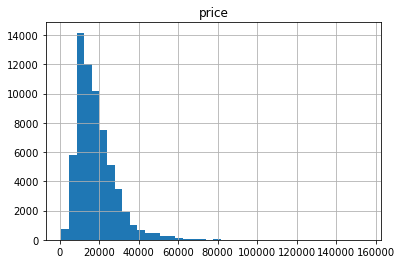

In [100]:
y_train.drop('Unnamed: 0', 1).hist(bins = 40)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028907EBACA0>]],
      dtype=object)

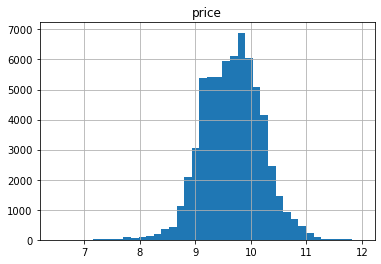

In [91]:
np.log(y_train+1).drop('Unnamed: 0', 1).hist(bins = 40)

# 2.2 Boxplot 

In [92]:
numeric_columns = ['year', 'mileage','tax','mpg','engineSize']

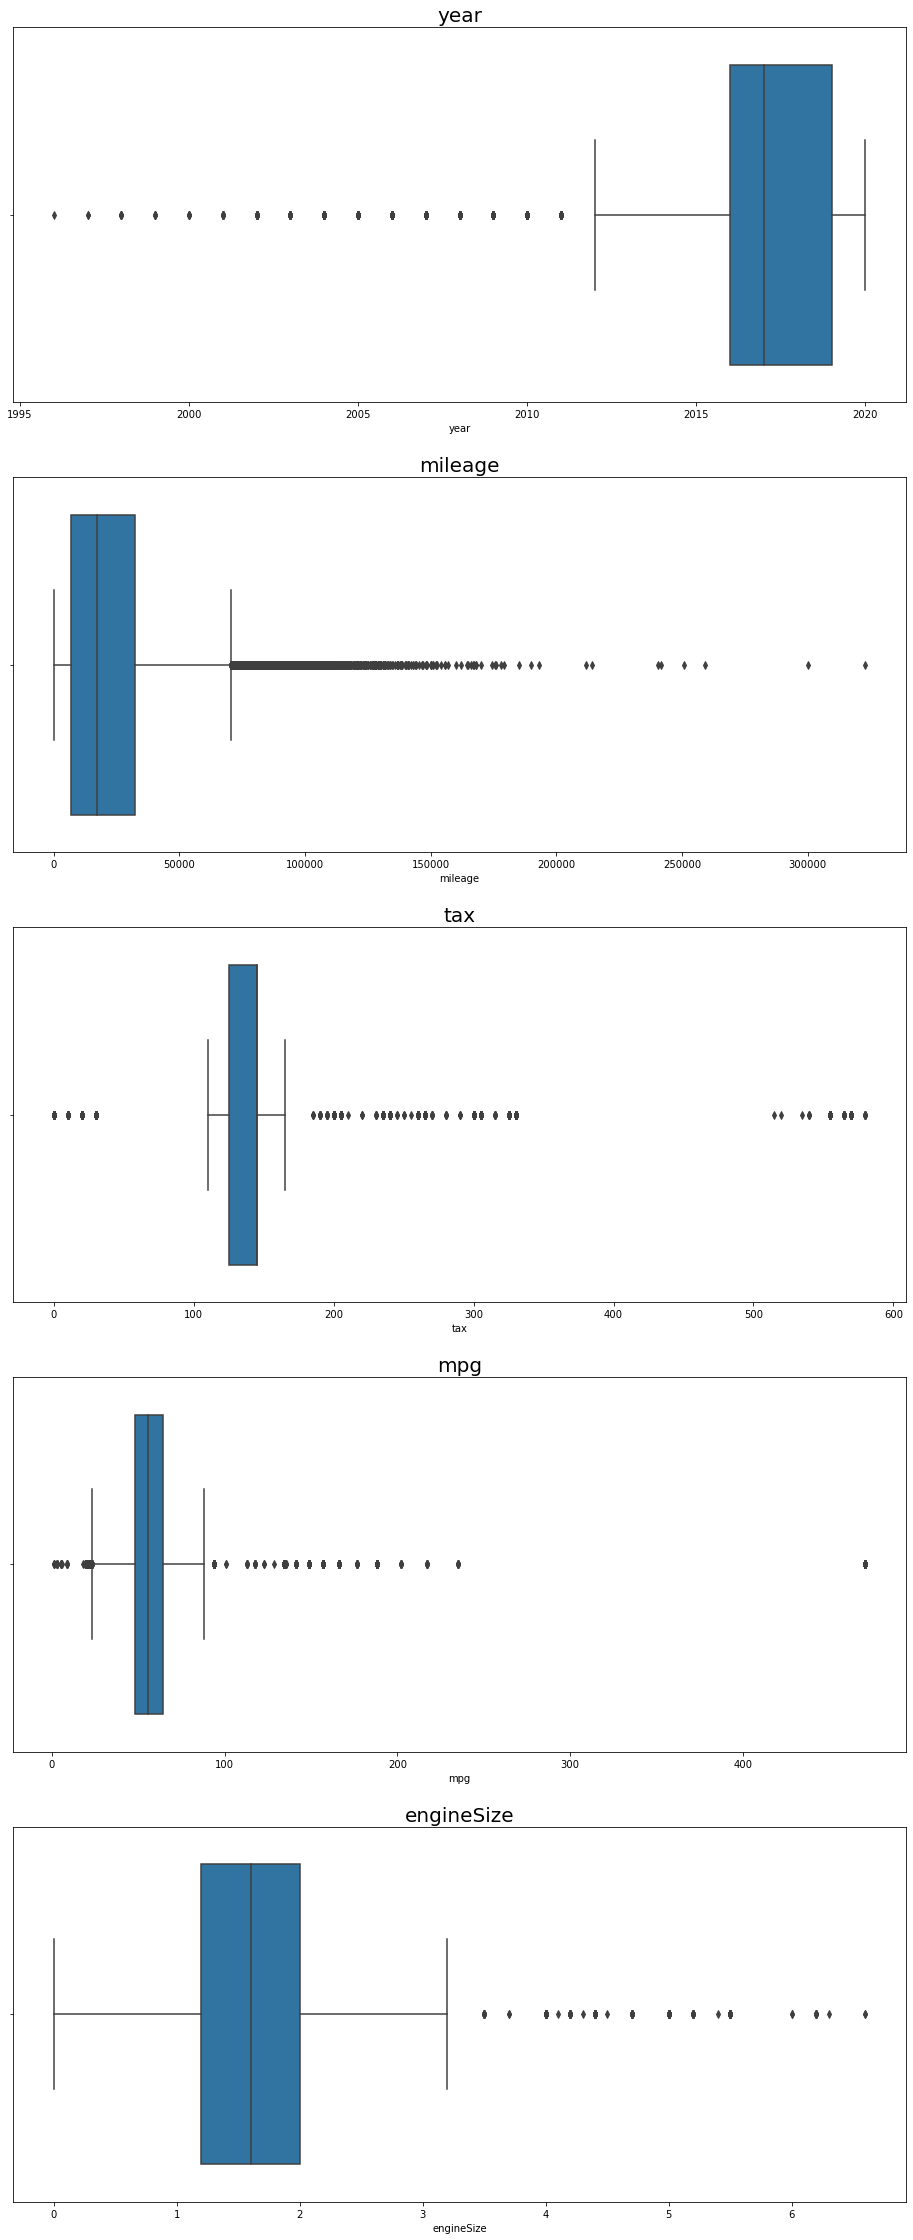

In [102]:
fig, axs = plt.subplots(nrows=5, figsize=(16, 40))

for index in range(5):
  axs[index] = sns.boxplot(x = train_data[numeric_columns[index]], data = train_data, ax =  axs[index])
  axs[index].set_title(numeric_columns[index],fontsize=20)

In [94]:
# drop elem with 2060 year
train_data = train_data.drop(train_data[train_data['Unnamed: 0'] == 17726].index)
y_train = y_train.drop(y_train[y_train['Unnamed: 0'] == 17726].index)

# 2.3 Car makers

In [71]:
train_and_y_data = train_data.copy()
train_and_y_data['price'] = y_train.price

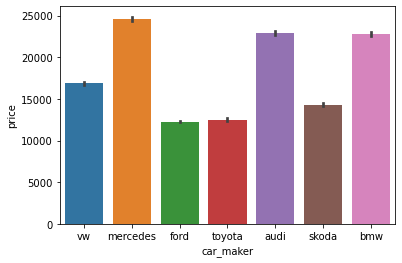

In [95]:
sns.barplot(train_and_y_data.car_maker, train_and_y_data.price)

# 2.4 Year

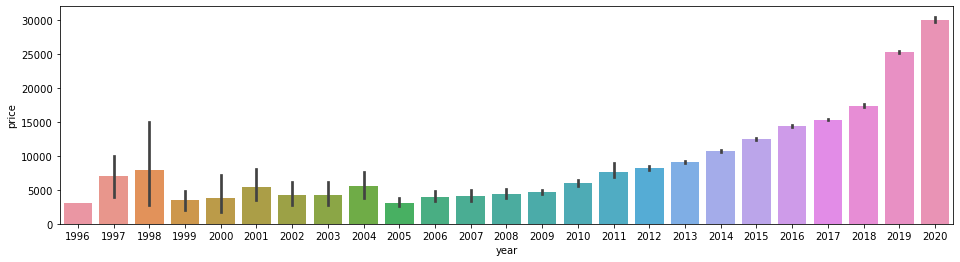

In [109]:
plt.figure(figsize=(16,4))
sns.barplot(train_and_y_data.year, train_and_y_data.price)

In [184]:
train_and_y_data.year.value_counts()


2019    17978
2017    13909
2016    10177
2018     8515
2015     4948
2020     3145
2014     2642
2013     1720
2012      401
2011      277
2010      193
2009      193
2008      133
2007      101
2006       64
2005       49
2004       33
2003       23
2002       22
2001       11
1998        7
2000        6
1999        5
1997        2
1996        1
Name: year, dtype: int64

# 2.5 Corr

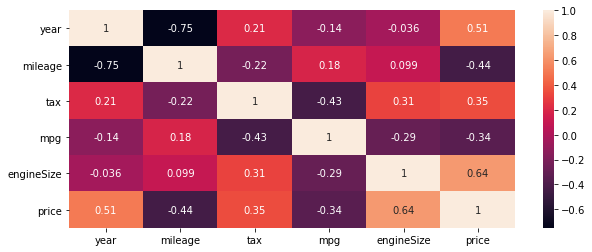

In [172]:
plt.figure(figsize = (10, 4))
sns.heatmap(train_and_y_data.drop('Unnamed: 0',1).corr(), annot = True)

# 3 Feature engineering

Перевести категоріальні признаки в числові

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(train_data, y_train, ) 